ARJUN KC (8773456)

**Assignment 2 CSCN8000 Artificial Intelligence Algorithms and Mathematics**

Download heart disease dataset heart.csv in Exercise folder and do following,  https://www.kaggle.com/fedesoriano/heart-failure-prediction

1.Consider the heart disease dataset in pandas dataframe
2.Remove outliers using mean,median,Z score. 
3.Convert text columns to numbers using label encoding and one hot encoding
4.Apply scaling
5.Build a machine learning classification model using support vector machine. 
  Demonstrate the standalone model as well as Bagging model and include observations about the oerformance
6.Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance
7.Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why. 
  
**Notes: This lab should be submitted as a notebook and an HTML. Follow https://docs.github.com/en/pages/quickstart.**
         

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from scipy.stats import zscore

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.shape

(918, 12)

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df["HeartDisease"].unique()

array([0, 1], dtype=int64)

In [9]:
df["HeartDisease"].nunique()

2

In [10]:
df["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

Lets do some EDA

Pairplot visualization to visualize the pair relation between numerical columns

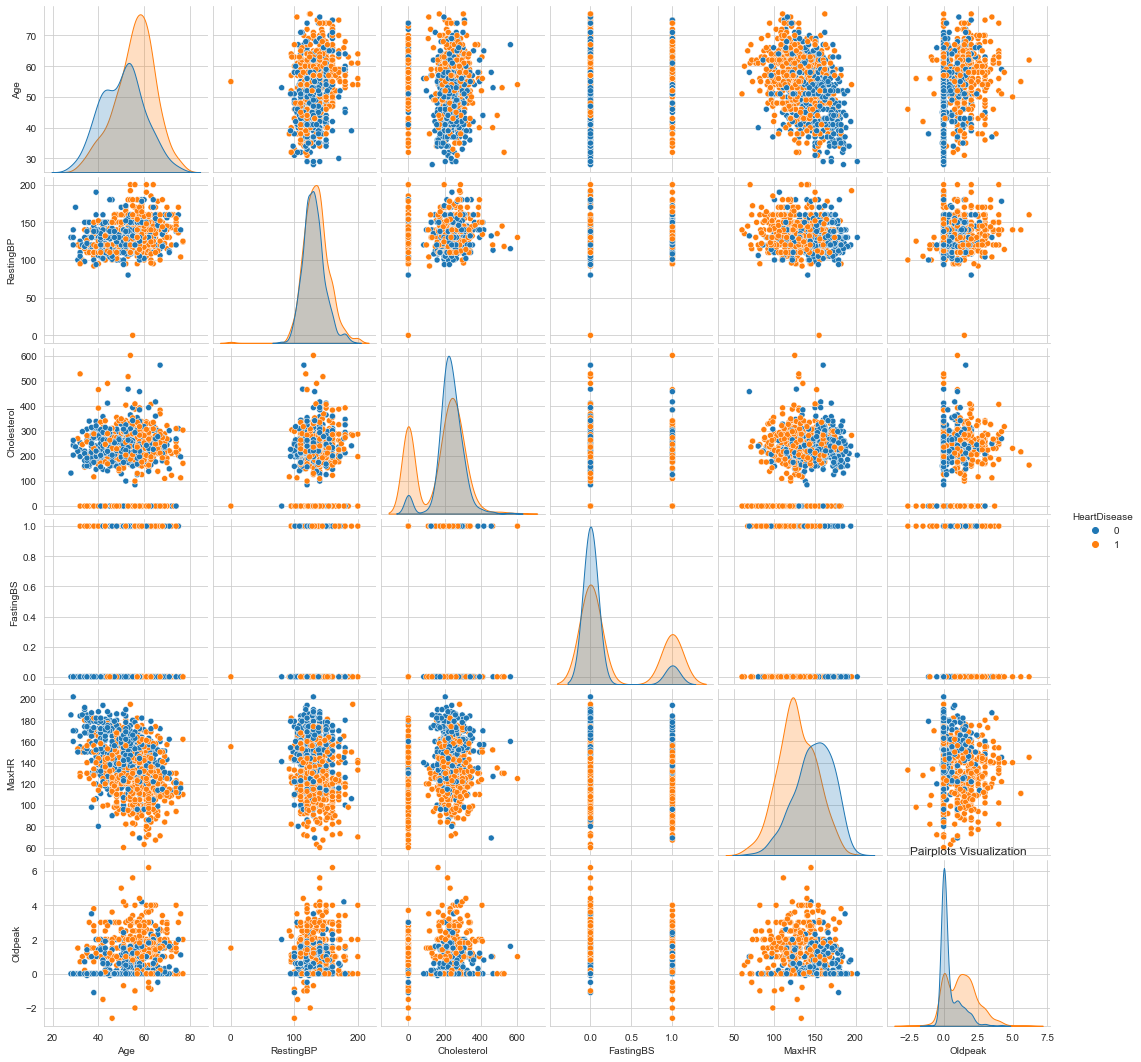

In [11]:
sns.pairplot(df, hue='HeartDisease', diag_kind='kde')
plt.title("Pairplots Visualization")
plt.show()

defining the count plot where number of person having heart disease and person not having heart disease can be visaulize

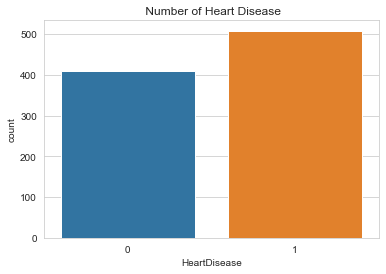

In [12]:
sns.countplot(x='HeartDisease', data=df)
plt.title(" Number of Heart Disease")
plt.show()


defining the heatmap to see the corelation

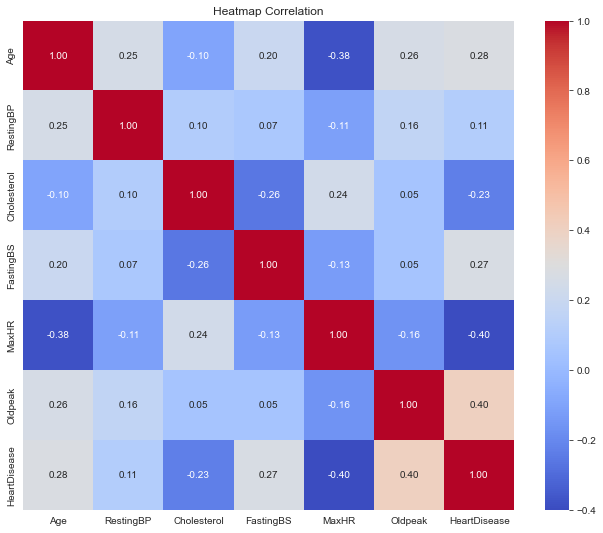

In [13]:
plt.figure(figsize=(11, 9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Correlation")
plt.show()


In [14]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Using Boxplot helps to visualize the outlier as well

In [15]:
num_col = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

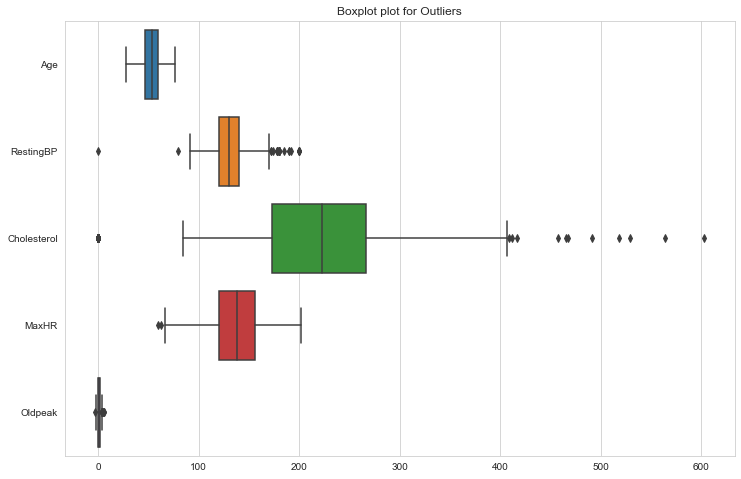

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[num_col], orient="h")
plt.title("Boxplot plot for Outliers")
plt.show()

From the HeartDisease columns, lets see how many of them has no heart disease and has heart disease

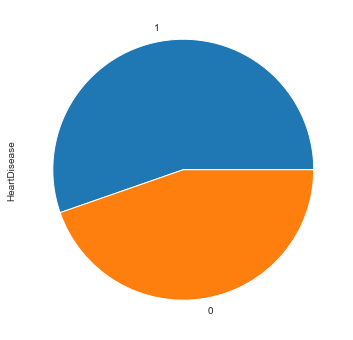

People with no_heart_disease: 410
People with heart_disease: 508
Portion of the Heart_disease is: 123.902


In [17]:
plt.figure(figsize=(8,6))
df["HeartDisease"].value_counts().plot(kind = "pie")
plt.show()
no_heart_disease = 410
heart_disease = 508
print("People with no_heart_disease:",no_heart_disease)
print("People with heart_disease:",heart_disease)
print("Portion of the Heart_disease is:", round(heart_disease/no_heart_disease *100,3))

## Now finding the outliers using mean,meadian and Zscore

In [18]:
num_col = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

## =>Using Mean()

In [19]:
means = df[num_col].mean()
stds = df[num_col].std()

In [20]:
lower_bound_m = means - 2 * stds
upper_bound_m = means + 2 * stds

In [21]:
df_cleaned_mean = df.copy()
for col in num_col:
    df_cleaned_mean = df_cleaned_mean[(df_cleaned_mean[col] > lower_bound_m[col]) & (df_cleaned_mean[col] < upper_bound_m[col])]

In [22]:
print("Original Shape:", df.shape)
print("Cleaned (mean) Shape:", df_cleaned_mean.shape)

Original Shape: (918, 12)
Cleaned (mean) Shape: (784, 12)


## => Using Meadian()

In [23]:
medians = df[num_col].median()
q1 = df[num_col].quantile(0.25)
q3 = df[num_col].quantile(0.75)
iqr = q3 - q1

In [24]:
lower_bound_M = q1 - 1.5 * iqr
upper_bound_M = q3 + 1.5 * iqr

In [25]:
df_cleaned_median = df.copy()
for col in num_col:
    df_cleaned_median = df_cleaned_median[(df_cleaned_median[col] > lower_bound_M[col]) & (df_cleaned_median[col] < upper_bound_M[col])]

In [26]:
print("Original Shape:", df.shape)
print("Cleaned (median) Shape:", df_cleaned_median.shape)

Original Shape: (918, 12)
Cleaned (median) Shape: (690, 12)


## =>Using Zscore()

In [27]:
z_scores = zscore(df[num_col])
df_Zscore = df[(z_scores < 3).all(axis=1)] 

In [28]:
print("Original Shape:", df.shape)
print("Cleaned (median) Shape:", df_Zscore.shape)

Original Shape: (918, 12)
Cleaned (median) Shape: (902, 12)


Converting object or text columns to numerical using One hot encoding and label encoder

In [29]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [30]:
lab = LabelEncoder()  #using label encoder for Sex and ExerciseAngina columns as there were only two unique item
df['Sex'] = lab.fit_transform(df['Sex'])
df['ExerciseAngina'] = lab.fit_transform(df['ExerciseAngina'])

In [31]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [32]:
df["ChestPainType"].nunique()

4

In [33]:
df["ST_Slope"].nunique()

3

In [34]:
df["RestingECG"].nunique()

3

using above column as one hot encoding as there are more than 2 unique items

In [35]:
df = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG','ST_Slope'])

In [36]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,0,0,0,1,0,1,0,0,1,0
914,68,1,144,193,1,141,0,3.4,1,1,0,0,0,0,1,0,0,1,0
915,57,1,130,131,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0
916,57,0,130,236,0,174,0,0.0,1,0,1,0,0,1,0,0,0,1,0


Now scaling the data

In [37]:
scaler = StandardScaler()
num_col = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'] 
df[num_col] = scaler.fit_transform(df[num_col])

In [38]:
df  #finally our all data has been scaled

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,1,0.410909,0.825070,0,1.382928,0,-0.832432,0,0,1,0,0,0,1,0,0,0,1
1,-0.478484,0,1.491752,-0.171961,0,0.754157,0,0.105664,1,0,0,1,0,0,1,0,0,1,0
2,-1.751359,1,-0.129513,0.770188,0,-1.525138,0,-0.832432,0,0,1,0,0,0,0,1,0,0,1
3,-0.584556,0,0.302825,0.139040,0,-1.132156,1,0.574711,1,1,0,0,0,0,1,0,0,1,0
4,0.051881,1,0.951331,-0.034755,0,-0.581981,0,-0.832432,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,-1.210356,0.596393,0,-0.188999,0,0.293283,1,0,0,0,1,0,1,0,0,1,0
914,1.536902,1,0.627078,-0.053049,1,0.164684,0,2.357094,1,1,0,0,0,0,1,0,0,1,0
915,0.370100,1,-0.129513,-0.620168,0,-0.857069,1,0.293283,1,1,0,0,0,0,1,0,0,1,0
916,0.370100,0,-0.129513,0.340275,0,1.461525,0,-0.832432,1,0,1,0,0,1,0,0,0,1,0


Now Building a machine learning classification model using support vector machine. Demonstrating the standalone model as well as Bagging model and including observations about the oerformance

In [57]:
X = df.drop(columns=['HeartDisease'])  #independent vaiable or feature columns
y = df['HeartDisease']  #dependent variable or target colums

splitting the data into train and test

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


Using SVM model

In [64]:
svm_modl = SVC(kernel="linear")
svm_modl.fit(X_train, y_train)
y_prd_svm = svm_modl.predict(X_test)

Now defining Bagging Model using SVM as the base estimator

In [70]:
bagng_modl = BaggingClassifier(base_estimator=SVC(kernel="linear"), n_estimators=10)
bagng_modl.fit(X_train, y_train)
y_prd_bagng = bagng_modl.predict(X_test)

In [71]:
CM_svm = confusion_matrix(y_test, y_prd_svm)
Reprt_svm = classification_report(y_test, y_prd_svm)

Now evaluating the model accuracy

In [72]:
accuracy_svm = accuracy_score(y_test, y_prd_svm)
accuracy_bagng = accuracy_score(y_test, y_prd_bagng)

print(f"Standalone SVM Accuracy: {accuracy_svm}")
print(f"Bagging SVM Accuracy: {accuracy_bagng}")

Standalone SVM Accuracy: 0.8804347826086957
Bagging SVM Accuracy: 0.8858695652173914


In [73]:
print("SVM Confusion Matrix:")
print(CM_svm)
print("\nSVM Classification Report:")
print(Reprt_svm)

SVM Confusion Matrix:
[[63 12]
 [10 99]]

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        75
           1       0.89      0.91      0.90       109

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184



In [74]:
Bag_CM = confusion_matrix(y_test, y_prd_bagng)
Rept_Bag = classification_report(y_test, y_prd_bagng)
print("Bagging Model Confusion Matrix at base estimator SVM:")
print(Bag_CM)
print("Bagging Model Classification Report at base estimator SVM:")
print(Rept_Bag)

Bagging Model Confusion Matrix at base estimator SVM:
[[64 11]
 [10 99]]
Bagging Model Classification Report at base estimator SVM:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        75
           1       0.90      0.91      0.90       109

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



The accuracy of the SVM and Bagging models in predicting heart disease is similar at around 88%. 

Both models accurately classify cases of the negative class (No Heart Disease), but they differ slightly  when it comes to occurrences of the positive class (Heart Disease).

Depending on variables like interpretability, training duration, and particular issue needs, one model may be preferred over another. 

Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance

Defining Standalone Decision Tree Model

In [47]:
DTree_model = DecisionTreeClassifier()
DTree_model.fit(X_train, y_train)
y_prd_DTree = DTree_model.predict(X_test)

Now defining Bagging Model using Decision Tree as the base estimator

In [48]:
Bag_DT_modl = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
Bag_DT_modl.fit(X_train, y_train)
y_prd_bag_dt = Bag_DT_modl.predict(X_test)

Now evaluating the model accuracy

In [53]:
accuracy_DTree = accuracy_score(y_test, y_prd_DTree)
accuracy_Bag_DT = accuracy_score(y_test, y_prd_bag_dt)

print(f"Standalone Decision Tree Accuracy: {accuracy_DTree}")
print(f"Bagging Decision Tree Accuracy: {accuracy_Bag_DT}")

Standalone Decision Tree Accuracy: 0.8043478260869565
Bagging Decision Tree Accuracy: 0.8152173913043478


In [54]:
CM_DTree = confusion_matrix(y_test, y_prd_DTree)
Reprt_DTree = classification_report(y_test, y_prd_DTree)

In [55]:
print("Decision Tree Confusion Matrix:")
print(CM_DTree)
print("\nDecision Tree Classification Report:")
print(Reprt_DTree)

Decision Tree Confusion Matrix:
[[61 14]
 [22 87]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77        75
           1       0.86      0.80      0.83       109

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184



In [56]:
Bag_CM_DTree = confusion_matrix(y_test, y_prd_bag_dt)
Rept_Bag_DTree = classification_report(y_test, y_prd_bag_dt)
print("Bagging Model Confusion Matrix at base estimtor Decision Tree:")
print(Bag_CM_DTree)
print("Bagging Model Classification Report at base estimator Decision Tree:")
print(Rept_Bag_DTree)

Bagging Model Confusion Matrix at base estimtor Decision Tree:
[[60 15]
 [19 90]]
Bagging Model Classification Report at base estimator Decision Tree:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        75
           1       0.86      0.83      0.84       109

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184



Bagging model with Decision Tree as base estimator has higher accuracy as compare to standalone Decision Tree.

Bagging model with Decision Tree as base estimator accurately classifies cases of both No Heart Disease and Heart Disease, with an accuracy rate of 82%, showing increased performance. 

Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why.

In terms of accuracy, precision, recall, and F1-score, the SVM classifier performs better than the Decision Tree classifier.

Compared to the Decision Tree classifier, it properly identifies more occurrences of the positive class (Heart Disease).

The decision to combine Bagging with the Decision Tree classifier makes the most sense and some of the reason for this are explained below:


-improvement of model performance

-reduce variance as decision tree seems to have higher variance can cause overfitting and using bagging help to reduce variance

-bagging can boost the overall perforamance of Decision Tree classifier where Decision Tree stand alone isnot getting good accuracy 

